Importo un jason per capire cosa sono i file jason 

In [1]:
import pandas as pd
import geopandas as gpd
from datetime import time, timedelta, datetime, date 

In [2]:
import json
import numpy as np
from pathlib  import Path
import matplotlib as mpl
#ho cambiato il percorso così da lavorare direttamente nella repo
data_path = Path('.././data/raw')
data_path2 = Path('.././data/external')
files = {'grid':'trentino-grid.geojson',
         'adm_reg':'administrative_regions_Trentino.json',        
         'NOV-DATA':'SET-nov-2013.csv',
         'DEC-DATA':'SET-dec-2013.csv',
         'SET-lines':'line.csv',
         'inquinamento' :  'APPA_inquinamento_aria_Nov_Dec_2013.csv',
        }

In [3]:
import json
with open(data_path / files['grid']) as f:
    grid_json = json.load(f)

In [4]:
# abbiamo esplorato un attimo cosa c'è dentro il file che restituisce l'inquinamento orario  nei mesi di dicembre e novembre 2013 

In [5]:
df_inquinamento= pd.read_csv(data_path2 / files['inquinamento'] , encoding='latin-1')

In [6]:
pd.unique(df_inquinamento.Inquinante)

array(['PM10', 'PM2.5', 'Biossido di Azoto', 'Ozono', 'Biossido Zolfo',
       'Ossido di Carbonio'], dtype=object)

In [7]:
print(grid_json.keys())
#print(grid_json['crs'])
#print(grid_json['type'])
grid_json['features'][1]

dict_keys(['crs', 'type', 'features'])


{'geometry': {'type': 'Polygon',
  'coordinates': [[[10.927456267537572, 45.68179119797432],
    [10.940290010697588, 45.68157387892596],
    [10.939979018768243, 45.67257819153854],
    [10.927147329501077, 45.672795442796335],
    [10.927456267537572, 45.68179119797432]]]},
 'type': 'Feature',
 'id': 1,
 'properties': {'cellId': 39}}

In [8]:
print(grid_json['crs'])

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::4326'}}


In [9]:
print(grid_json['type'])

FeatureCollection


In [10]:
grid_json['type']

'FeatureCollection'

In [11]:
grid = gpd.GeoDataFrame(grid_json['features'])
grid.head()

,geometry,type,id,properties
0,"{'type': 'Polygon', 'coordinates': [[[10.91462...",Feature,0,{'cellId': 38}
1,"{'type': 'Polygon', 'coordinates': [[[10.92745...",Feature,1,{'cellId': 39}
2,"{'type': 'Polygon', 'coordinates': [[[10.94029...",Feature,2,{'cellId': 40}
3,"{'type': 'Polygon', 'coordinates': [[[10.90209...",Feature,3,{'cellId': 154}
4,"{'type': 'Polygon', 'coordinates': [[[10.91492...",Feature,4,{'cellId': 155}


In [12]:
from shapely.geometry import Polygon


In [13]:
print(grid)

                                               geometry     type    id  \
0     {'type': 'Polygon', 'coordinates': [[[10.91462...  Feature     0   
1     {'type': 'Polygon', 'coordinates': [[[10.92745...  Feature     1   
2     {'type': 'Polygon', 'coordinates': [[[10.94029...  Feature     2   
3     {'type': 'Polygon', 'coordinates': [[[10.90209...  Feature     3   
4     {'type': 'Polygon', 'coordinates': [[[10.91492...  Feature     4   
...                                                 ...      ...   ...   
6570  {'type': 'Polygon', 'coordinates': [[[11.80474...  Feature  6570   
6571  {'type': 'Polygon', 'coordinates': [[[11.81777...  Feature  6571   
6572  {'type': 'Polygon', 'coordinates': [[[11.79218...  Feature  6572   
6573  {'type': 'Polygon', 'coordinates': [[[11.80521...  Feature  6573   
6574  {'type': 'Polygon', 'coordinates': [[[11.81823...  Feature  6574   

             properties  
0        {'cellId': 38}  
1        {'cellId': 39}  
2        {'cellId': 40}  
3      

In [14]:

#grid.drop(columns=['geomPoint.geom'],inplace=True)
grid['geometry'] = grid['geometry'].apply(lambda x:Polygon(x['coordinates'][0]))
grid.head()

,geometry,type,id,properties
0,"POLYGON ((10.91462 45.68201, 10.92746 45.68179...",Feature,0,{'cellId': 38}
1,"POLYGON ((10.92746 45.68179, 10.94029 45.68157...",Feature,1,{'cellId': 39}
2,"POLYGON ((10.94029 45.68157, 10.95312 45.68136...",Feature,2,{'cellId': 40}
3,"POLYGON ((10.90209 45.69122, 10.91493 45.69100...",Feature,3,{'cellId': 154}
4,"POLYGON ((10.91493 45.69100, 10.92777 45.69079...",Feature,4,{'cellId': 155}


In [15]:
#grid.drop(columns=['geometry'],inplace=True)
grid.head()

,geometry,type,id,properties
0,"POLYGON ((10.91462 45.68201, 10.92746 45.68179...",Feature,0,{'cellId': 38}
1,"POLYGON ((10.92746 45.68179, 10.94029 45.68157...",Feature,1,{'cellId': 39}
2,"POLYGON ((10.94029 45.68157, 10.95312 45.68136...",Feature,2,{'cellId': 40}
3,"POLYGON ((10.90209 45.69122, 10.91493 45.69100...",Feature,3,{'cellId': 154}
4,"POLYGON ((10.91493 45.69100, 10.92777 45.69079...",Feature,4,{'cellId': 155}


In [16]:
grid['id'] = grid['properties'].apply(lambda x: x['cellId'])

<AxesSubplot:>

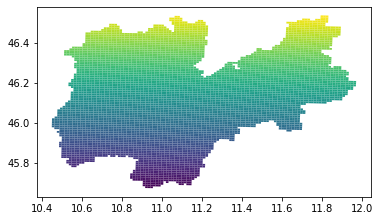

In [17]:
grid.plot('id') #vediamo che la mappa si plotta decentemente

In [18]:
#creo dataframe con dati relativi ai consumi di ogni linea ogni 10 min
nomi = ['LINESET', 'time', 'consumi']
df_consumi = pd.read_csv(data_path / files['NOV-DATA'], names = nomi)

In [19]:
df_consumi.head()

,LINESET,time,consumi
0,DG1000420,2013-11-01 00:00,37.439999
1,DG1000420,2013-11-01 00:10,37.439999
2,DG1000420,2013-11-01 00:20,36.000000
3,DG1000420,2013-11-01 00:30,35.279999
4,DG1000420,2013-11-01 00:40,35.279999


In [20]:
df_linee = pd.read_csv(data_path / files['SET-lines'])
df_linee.head()

,SQUAREID,LINESET,NR_UBICAZIONI
0,155,DG1031221,4
1,272,DG1031221,72
2,273,DG1031221,21
3,276,DG1003117,34
4,277,DG1003117,3


In [21]:
import numpy as np
dgrouped = df_linee.groupby('LINESET')['NR_UBICAZIONI'].sum()
df_ubi = pd.DataFrame(dgrouped)

In [22]:
df_ubi.reset_index()

,LINESET,NR_UBICAZIONI
0,DG1000011,6
1,DG1000023,62
2,DG1000420,2133
3,DG1000421,1424
4,DG1000422,3423
...,...,...
195,DG1099206,105
196,DG1099207,95
197,DG1099303,39
198,DG1099502,3


In [23]:
#sommo i consumi del mese su ogni linea con groupby
dgroupedcon = df_consumi.groupby('LINESET')['consumi'].sum()
df_con = pd.DataFrame(dgroupedcon)
df_con = df_con.reset_index()
df_consumoperub = pd.merge(left = df_con, right = df_ubi, how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
#df_consumoperub.tail()
df_consumoperub = df_consumoperub.fillna(0)
#trovo il consumo medio per ubicazione di ogni linea elettrica
df_consumoperub['cons_per_ubi'] = df_consumoperub['consumi'] / df_consumoperub['NR_UBICAZIONI']

In [24]:
df_consumoperub

,LINESET,consumi,NR_UBICAZIONI,cons_per_ubi
0,DG1000420,252097.548815,2133,118.189193
1,DG1000421,98566.436039,1424,69.218003
2,DG1000422,115750.855065,3423,33.815616
3,DG1000423,73870.196743,656,112.607007
4,DG1000425,141893.033643,2013,70.488343
...,...,...,...,...
195,DG1099206,0.000000,105,0.000000
196,DG1099207,0.000000,95,0.000000
197,DG1099303,0.000000,39,0.000000
198,DG1099502,0.000000,3,0.000000


In [25]:
df_cons_per_cella = pd.merge(left = df_linee, right = df_consumoperub[['LINESET','cons_per_ubi']], how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )

In [26]:
df_cons_per_cella

,SQUAREID,LINESET,NR_UBICAZIONI,cons_per_ubi
0,155,DG1031221,4,138.532316
1,272,DG1031221,72,138.532316
2,273,DG1031221,21,138.532316
3,389,DG1031221,65,138.532316
4,390,DG1031221,8,138.532316
...,...,...,...,...
2570,10868,DG1013504,9,2872.742793
2571,10982,DG1013504,1,2872.742793
2572,10983,DG1013504,5,2872.742793
2573,10984,DG1013504,2,2872.742793


In [27]:
# moltiplichiamo le due colonne per sapere il consumo per cella riferito a duna line aspecifica 
df_cons_per_cella['consumo_per_cella'] = df_cons_per_cella['NR_UBICAZIONI']*df_cons_per_cella['cons_per_ubi']
df_cons_per_cella

,SQUAREID,LINESET,NR_UBICAZIONI,cons_per_ubi,consumo_per_cella
0,155,DG1031221,4,138.532316,554.129263
1,272,DG1031221,72,138.532316,9974.326737
2,273,DG1031221,21,138.532316,2909.178632
3,389,DG1031221,65,138.532316,9004.600526
4,390,DG1031221,8,138.532316,1108.258526
...,...,...,...,...,...
2570,10868,DG1013504,9,2872.742793,25854.685139
2571,10982,DG1013504,1,2872.742793,2872.742793
2572,10983,DG1013504,5,2872.742793,14363.713966
2573,10984,DG1013504,2,2872.742793,5745.485587


In [28]:
# facciamo un groupby per sapere l'effettivo consumo per cella sommando sulle linee che ci passano attraverso 


In [29]:
dgrouped = df_cons_per_cella.groupby('SQUAREID')['consumo_per_cella'].sum()
df_cons_per_cella = pd.DataFrame(dgrouped)
df_cons_per_cella = df_cons_per_cella.reset_index()
df_cons_per_cella

,SQUAREID,consumo_per_cella
0,155,554.129263
1,272,9974.326737
2,273,2909.178632
3,276,5116.662782
4,277,451.470245
...,...,...
2015,10983,14363.713966
2016,10984,5745.485587
2017,11097,198.019225
2018,11098,1188.115350


In [30]:
#adesso dobbiamo fare un merge con il database con le celle, prendendo come indicie comune il cell 
#id che è lo squareid nel database di consumi per cella 


In [31]:
df_mappa = pd.merge(left = grid, right = df_cons_per_cella, how = 'left', left_on='id', right_on='SQUAREID'  )

In [32]:
#questa riga di codice serve per vedere se ci sono linee che passano in celle ma non hanno consumo, perchè evidentemente non hanno ubicazioni 
#spoiler nel dataset di novembre ce ne sono ben 37
#per ora abbandoniamo l'idea di un plot in scala logaritmica
sum(df_mappa.consumo_per_cella == 0)

37

In [33]:
df_mappa['consumo_per_cella'] = df_mappa['consumo_per_cella'].fillna(0)
# tentativo di fare una scala logaritmica 
#df_mappa['log_consumi'] = np.log(df_mappa['consumo_per_cella'])
#mynorm = mpl.colors.LogNorm(vmin=np.nanmin(df_mappa.iloc[:,5].values) ,vmax=df_mappa['consumo_per_cella'].max() )
#df_mappa.plot('consumo_per_cella', cmap = 'YlOrRd', norm=mynorm)
#df_mappa['consumo_per_cella'].min()

<AxesSubplot:>

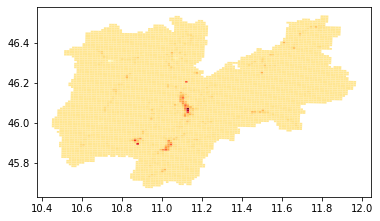

In [34]:
df_mappa.plot('consumo_per_cella', cmap = 'YlOrRd' )

Adesso procediamo cercando di capire se ci sono delle zone che presentano una grande variazione di consumi fra il giorno e la notte ? 

In [35]:
# abbiamo diviso la colonna time in data e ora per riuscire a gestire meglio i dati
#df_consumi[['Date', 'hour']] =df_consumi['time'].str.split(' ', expand=True)
# divido le celle 
df_consumi[['giorno','ora']] = df_consumi.time.str.split(" ",expand=True)

df_consumi.time = df_consumi.time.apply(datetime.fromisoformat)

In [36]:
#df_consumi['time'].hour

In [37]:
#l'idea ora è di dividere i consumi in consumi diurni e consumi notturni 

#abbiamo convertito la colonna ora in uno formato ora e data stardard 
#A = df_consumi.hour.isin(np.date_range(00:00, 12:00))


In [38]:
print(timedelta( minutes = 10))
print(time(hour = 8, minute = 0, second = 0))

0:10:00
08:00:00


In [39]:
#day = np.arange(datetime(hour = 8, minute = 0, second = 0), datetime(hour = 20, minute = 10, second = 0), timedelta(minutes = 10)).astype(time)
print(df_consumi)

          LINESET                time    consumi      giorno    ora
0       DG1000420 2013-11-01 00:00:00  37.439999  2013-11-01  00:00
1       DG1000420 2013-11-01 00:10:00  37.439999  2013-11-01  00:10
2       DG1000420 2013-11-01 00:20:00  36.000000  2013-11-01  00:20
3       DG1000420 2013-11-01 00:30:00  35.279999  2013-11-01  00:30
4       DG1000420 2013-11-01 00:40:00  35.279999  2013-11-01  00:40
...           ...                 ...        ...         ...    ...
794513  DG1056626 2013-11-30 23:10:00  46.549999  2013-11-30  23:10
794514  DG1056626 2013-11-30 23:20:00  44.650002  2013-11-30  23:20
794515  DG1056626 2013-11-30 23:30:00  44.599998  2013-11-30  23:30
794516  DG1056626 2013-11-30 23:40:00  43.700001  2013-11-30  23:40
794517  DG1056626 2013-11-30 23:50:00  43.125000  2013-11-30  23:50

[794518 rows x 5 columns]


In [40]:
# uso magia di stack exchange per dividere il database in due database uno con i consumi diurni e uno con i consumi notturni 
mask = (pd.to_timedelta(df_consumi['ora'].astype(str).add(':00'))
          .between(pd.Timedelta('08:30:00'), pd.Timedelta('17:00:00')))

In [41]:
df_consumidiurni = df_consumi[mask]
df_consuminotturni = df_consumi[~mask]

In [42]:
df_linee

,SQUAREID,LINESET,NR_UBICAZIONI
0,155,DG1031221,4
1,272,DG1031221,72
2,273,DG1031221,21
3,276,DG1003117,34
4,277,DG1003117,3
...,...,...,...
2570,10983,DG1013504,5
2571,10984,DG1013504,2
2572,11097,DG1013503,1
2573,11098,DG1013503,6


In [43]:
dgroupedcondiurni = df_consumidiurni.groupby('LINESET')['consumi'].sum()
df_condiurni = pd.DataFrame(dgroupedcondiurni)
#df_condiurni.head

In [44]:
df_condiurni = df_condiurni.reset_index()
df_consumoperubdiurni = pd.merge(left = df_condiurni, right = df_ubi, how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
df_consumoperubdiurni = df_consumoperubdiurni.fillna(0)
#df_consumoperubdiurni

In [45]:
df_consumoperubdiurni['cons_per_ubi'] = df_consumoperubdiurni['consumi'] / df_consumoperubdiurni['NR_UBICAZIONI']
df_cons_per_cella_diurni = pd.merge(left = df_linee, right = df_consumoperubdiurni[['LINESET','cons_per_ubi']], how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
df_cons_per_cella_diurni['consumo_per_cella'] = df_cons_per_cella_diurni['NR_UBICAZIONI']*df_cons_per_cella_diurni['cons_per_ubi']
df_cons_per_cella_diurni

,SQUAREID,LINESET,NR_UBICAZIONI,cons_per_ubi,consumo_per_cella
0,155,DG1031221,4,50.943535,203.774140
1,272,DG1031221,72,50.943535,3667.934528
2,273,DG1031221,21,50.943535,1069.814237
3,389,DG1031221,65,50.943535,3311.329782
4,390,DG1031221,8,50.943535,407.548281
...,...,...,...,...,...
2570,10868,DG1013504,9,997.818469,8980.366222
2571,10982,DG1013504,1,997.818469,997.818469
2572,10983,DG1013504,5,997.818469,4989.092346
2573,10984,DG1013504,2,997.818469,1995.636938


In [46]:
dgroupeddiurni = df_cons_per_cella_diurni.groupby('SQUAREID')['consumo_per_cella'].sum()
df_cons_per_cella_diurni = pd.DataFrame(dgroupeddiurni)
df_cons_per_cella_diurni = df_cons_per_cella_diurni.reset_index()
#df_cons_per_cella_diurni

<AxesSubplot:>

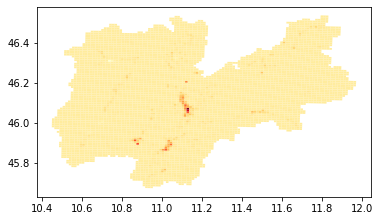

In [47]:
df_mappa_diurni = pd.merge(left = grid, right = df_cons_per_cella_diurni, how = 'left', left_on='id', right_on='SQUAREID'  )
df_mappa_diurni['consumo_per_cella'] = df_mappa_diurni['consumo_per_cella'].fillna(0)
df_mappa_diurni.plot('consumo_per_cella', cmap = 'YlOrRd' )
#df_mappa_diurni.head(40)

In [48]:
df_consumoperubdiurni

,LINESET,consumi,NR_UBICAZIONI,cons_per_ubi
0,DG1000420,96261.115736,2133,45.129449
1,DG1000421,31753.678718,1424,22.298932
2,DG1000422,36189.958368,3423,10.572585
3,DG1000423,28743.838723,656,43.816827
4,DG1000425,50326.137689,2013,25.000565
...,...,...,...,...
195,DG1099206,0.000000,105,0.000000
196,DG1099207,0.000000,95,0.000000
197,DG1099303,0.000000,39,0.000000
198,DG1099502,0.000000,3,0.000000


In [49]:
def plotmap( datiConsumi, df_linee, grid ):
    ''' Plotta una mappa in scala di colore a partire dai dati relativi ai consumi (descrizione da completare)'''
    dgrouped1 = df_linee.groupby('LINESET')['NR_UBICAZIONI'].sum()
    df_ubi = pd.DataFrame(dgrouped1)
    df_ubi.head
    dgrouped = datiConsumi.groupby('LINESET')['consumi'].sum()
    df_con1 = pd.DataFrame(dgrouped)
    df_con1 = df_con1.reset_index()
    df_consperub = pd.merge(left = df_con1, right = df_ubi, how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
    df_consperub = df_consperub.fillna(0)
    df_consperub['cons_per_ubi'] = df_consperub['consumi'] / df_consperub['NR_UBICAZIONI']
    df_cons_per_cella = pd.merge(left = df_linee, right = df_consperub[['LINESET','cons_per_ubi']], how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
    df_cons_per_cella['consumo_per_cella'] = df_cons_per_cella['NR_UBICAZIONI']*df_cons_per_cella['cons_per_ubi']
 
    dgrouped2 = df_cons_per_cella.groupby('SQUAREID')['consumo_per_cella'].sum()
    df_cons_per_cella = pd.DataFrame(dgrouped2)
    df_cons_per_cella = df_cons_per_cella.reset_index()
    df_mappa_ = pd.merge(left = grid, right = df_cons_per_cella, how = 'left', left_on='id', right_on='SQUAREID'  )
    df_mappa_['consumo_per_cella'] = df_mappa_['consumo_per_cella'].fillna(0)
    return df_mappa_
    

In [50]:
df_mappa_giorno = plotmap( df_consumidiurni, df_linee , grid)
df_mappa_notte = plotmap( df_consuminotturni, df_linee, grid)
#df_mappa_giorno.head(40) #3762.252046
df_mappa_notte
df_mappa_generale = plotmap( df_consumi, df_linee , grid)
#df_mappa_generale.head(40) #3762.252046


<AxesSubplot:>

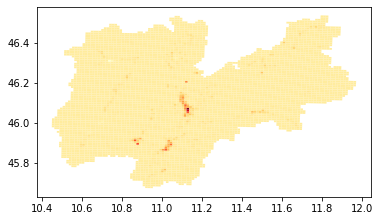

In [51]:
df_mappa_giorno.plot('consumo_per_cella', cmap = 'YlOrRd' )

<AxesSubplot:>

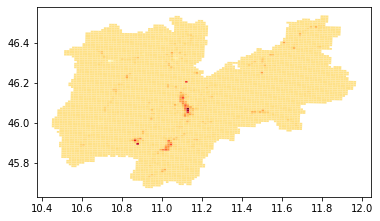

In [52]:
df_mappa_notte.plot('consumo_per_cella', cmap = 'YlOrRd' )

In [53]:
df_consumi

,LINESET,time,consumi,giorno,ora
0,DG1000420,2013-11-01 00:00:00,37.439999,2013-11-01,00:00
1,DG1000420,2013-11-01 00:10:00,37.439999,2013-11-01,00:10
2,DG1000420,2013-11-01 00:20:00,36.000000,2013-11-01,00:20
3,DG1000420,2013-11-01 00:30:00,35.279999,2013-11-01,00:30
4,DG1000420,2013-11-01 00:40:00,35.279999,2013-11-01,00:40
...,...,...,...,...,...
794513,DG1056626,2013-11-30 23:10:00,46.549999,2013-11-30,23:10
794514,DG1056626,2013-11-30 23:20:00,44.650002,2013-11-30,23:20
794515,DG1056626,2013-11-30 23:30:00,44.599998,2013-11-30,23:30
794516,DG1056626,2013-11-30 23:40:00,43.700001,2013-11-30,23:40


In [54]:
# ho aggiunto una colonna che mi enumera i giorni della settimana 
df_consumi["giorno"] = pd.to_datetime(df_consumi["giorno"])
df_consumi["DayOfWeek"] = df_consumi["giorno"].dt.weekday
df_consumi

,LINESET,time,consumi,giorno,ora,DayOfWeek
0,DG1000420,2013-11-01 00:00:00,37.439999,2013-11-01,00:00,4
1,DG1000420,2013-11-01 00:10:00,37.439999,2013-11-01,00:10,4
2,DG1000420,2013-11-01 00:20:00,36.000000,2013-11-01,00:20,4
3,DG1000420,2013-11-01 00:30:00,35.279999,2013-11-01,00:30,4
4,DG1000420,2013-11-01 00:40:00,35.279999,2013-11-01,00:40,4
...,...,...,...,...,...,...
794513,DG1056626,2013-11-30 23:10:00,46.549999,2013-11-30,23:10,5
794514,DG1056626,2013-11-30 23:20:00,44.650002,2013-11-30,23:20,5
794515,DG1056626,2013-11-30 23:30:00,44.599998,2013-11-30,23:30,5
794516,DG1056626,2013-11-30 23:40:00,43.700001,2013-11-30,23:40,5


In [55]:
# ho aggiunto un altra colonna che mi dice se il giorno è un week end o meno
df_consumi["isweekend"] = df_consumi["giorno"].dt.weekday > 4
Ntot = len(df_consumi.index)

In [56]:
# adesso procedo a dividere in due il database in base alla condizione weekend o meno
# proverò a farlo con la stessa procesura seguita per il giorno e la notte 

In [57]:
# sono riuscita a dividere i due database filtrando con la condizione sulla colonna DayOfweek molto più comoda di isweekend 

In [58]:
df_consumisettimana = df_consumi[df_consumi.DayOfWeek < 5]
Nset = len(df_consumisettimana.index)


In [59]:
df_consumiweekend = df_consumi[df_consumi.DayOfWeek > 4]

In [60]:
df_mappa_settimana = plotmap( df_consumisettimana, df_linee , grid)
df_mappa_weekend = plotmap( df_consumiweekend, df_linee, grid)
#normalizzo
df_mappa_settimana['consumo_per_cella']/=Nset*144
df_mappa_weekend['consumo_per_cella']/=(Ntot-Nset)*144
# ci sono 144 righe ogni giorno 


In [61]:
df_mappa_settimana

,geometry,type,id,properties,SQUAREID,consumo_per_cella
0,"POLYGON ((10.91462 45.68201, 10.92746 45.68179...",Feature,38,{'cellId': 38},NaN,0.000000
1,"POLYGON ((10.92746 45.68179, 10.94029 45.68157...",Feature,39,{'cellId': 39},NaN,0.000000
2,"POLYGON ((10.94029 45.68157, 10.95312 45.68136...",Feature,40,{'cellId': 40},NaN,0.000000
3,"POLYGON ((10.90209 45.69122, 10.91493 45.69100...",Feature,154,{'cellId': 154},NaN,0.000000
4,"POLYGON ((10.91493 45.69100, 10.92777 45.69079...",Feature,155,{'cellId': 155},155.0,0.000005
...,...,...,...,...,...,...
6570,"POLYGON ((11.80475 46.52767, 11.81777 46.52735...",Feature,11336,{'cellId': 11336},NaN,0.000000
6571,"POLYGON ((11.81777 46.52735, 11.83080 46.52703...",Feature,11337,{'cellId': 11337},NaN,0.000000
6572,"POLYGON ((11.79219 46.53698, 11.80521 46.53666...",Feature,11452,{'cellId': 11452},NaN,0.000000
6573,"POLYGON ((11.80521 46.53666, 11.81824 46.53634...",Feature,11453,{'cellId': 11453},NaN,0.000000


In [62]:
#faccio la differenza tra i consumi della settimana e quelli del weekend.

df_mappa_weekend['DIFFCONSUMI'] = df_mappa_settimana['consumo_per_cella']-df_mappa_weekend['consumo_per_cella']


<AxesSubplot:>

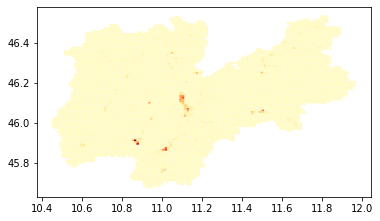

In [63]:
df_mappa_weekend.plot('DIFFCONSUMI', cmap="YlOrRd")

In [64]:
with open(data_path / files['adm_reg']) as f:
    adm_json = json.load(f)
print(adm_json.keys())

dict_keys(['count', 'items', 'datagem-version'])


In [65]:
from shapely.geometry import Point

In [66]:
gdf_adm = gpd.GeoDataFrame(adm_json['items'])
gdf_adm['geometry'][0]['coordinates'][0][0][0]
punto = Point(  gdf_adm['geometry'][0]['coordinates'][0][0][0],gdf_adm['geometry'][0]['coordinates'][0][0][1]     ) 
#gdf_adm['geometry'] = gdf_adm['geometry'].dropna()
#gdf_adm = gdf_adm['geometry'].apply(lambda x:Point(  x['coordinates'][0][0][0],x['coordinates'][0][0][1]     ) )
#gdf_adm.explore()
#print(punto)

In [67]:
gdf_adm.columns

Index(['euroCode', 'website', 'population', 'cadastralCode', 'elevation',
       'acheneID', 'name', 'level', 'geometry', 'provenance', 'wikipedia',
       'isProvinceCheflieu', 'postCodes', 'parentAchenes', 'alternateNames',
       'localCode', 'isMountainMunicipality', 'geomComplex'],
      dtype='object')

In [68]:
#gdf_comuni = gpd.GeoDataFrame( data=[gdf_adm['name'], gdf_adm['geometry']  ], index=gdf_adm.index ) 
gdf_comuni = gdf_adm[['name','geometry']]
gdf_comuni
dgrouped = gdf_comuni.groupby('name')['geometry'].sum()
gdf_com = pd.DataFrame(dgrouped)
gdf_com = gdf_com.reset_index()
gdf_com = gdf_com[gdf_com.geometry != 0]
print(gdf_com)

                name                                           geometry
3                Ala  {'type': 'Polygon', 'coordinates': [[[11.00168...
6            Albiano  {'type': 'Polygon', 'coordinates': [[[11.20856...
7             Aldeno  {'type': 'Polygon', 'coordinates': [[[11.10405...
10            Amblar  {'type': 'Polygon', 'coordinates': [[[11.16986...
11            Andalo  {'type': 'MultiPolygon', 'coordinates': [[[[11...
..               ...                                                ...
908    Villa Rendena  {'type': 'Polygon', 'coordinates': [[[10.60991...
919           Volano  {'type': 'Polygon', 'coordinates': [[[11.07405...
922          Zambana  {'type': 'MultiPolygon', 'coordinates': [[[[11...
927  Ziano di Fiemme  {'type': 'Polygon', 'coordinates': [[[11.55934...
935            Zuclo  {'type': 'MultiPolygon', 'coordinates': [[[[10...

[217 rows x 2 columns]


In [69]:
gdf_com['geometry'][11]

{'type': 'MultiPolygon',
 'coordinates': [[[[11.002860122173386, 46.18067039235295],
    [11.003412492129556, 46.180491319042844],
    '...']],
  [[[10.934979499890332, 46.1588931962302],
    [10.93624100121862, 46.15862196452067],
    '...']]]}

In [70]:
#df_adm['geometry'] = df_adm['geometry'].apply(lambda x:Polygon(x['coordinates']))
#df_adm.head(165)

In [71]:
# uso magia di stack exchange per dividere il database in due database uno con i consumi diurni e uno con i consumi notturni 
maskday = (pd.to_timedelta(df_consumi['ora'].astype(str).add(':00'))
          .between(pd.Timedelta('08:00:00'), pd.Timedelta('19:00:00')))
maskevening = (pd.to_timedelta(df_consumi['ora'].astype(str).add(':00'))
          .between(pd.Timedelta('19:00:00'), pd.Timedelta('24:00:00')))

In [72]:
df_consumiday = df_consumi[maskday]
df_consumievening = df_consumi[maskevening]
df_consumiday = df_consumiday[df_consumiday.DayOfWeek < 5]
df_consumiday
df_consumievening = df_consumievening[df_consumievening.DayOfWeek < 5]
df_consumievening

,LINESET,time,consumi,giorno,ora,DayOfWeek,isweekend
114,DG1000420,2013-11-01 19:00:00,51.839996,2013-11-01,19:00,4,False
115,DG1000420,2013-11-01 19:10:00,51.839996,2013-11-01,19:10,4,False
116,DG1000420,2013-11-01 19:20:00,50.759998,2013-11-01,19:20,4,False
117,DG1000420,2013-11-01 19:30:00,49.499996,2013-11-01,19:30,4,False
118,DG1000420,2013-11-01 19:40:00,50.039997,2013-11-01,19:40,4,False
...,...,...,...,...,...,...,...
794369,DG1056626,2013-11-29 23:10:00,47.450001,2013-11-29,23:10,4,False
794370,DG1056626,2013-11-29 23:20:00,45.875000,2013-11-29,23:20,4,False
794371,DG1056626,2013-11-29 23:30:00,44.799999,2013-11-29,23:30,4,False
794372,DG1056626,2013-11-29 23:40:00,44.299999,2013-11-29,23:40,4,False


In [73]:
# possiamo dividere i dati fra train e test 

In [111]:
def calcolaconsumi( datiConsumi, df_linee, grid ):
    ''' Plotta una mappa in scala di colore a partire dai dati relativi ai consumi (descrizione da completare)'''
    dgrouped1 = df_linee.groupby('LINESET')['NR_UBICAZIONI'].sum()
    df_ubi = pd.DataFrame(dgrouped1)
    ##print(df_ubi)
    dgrouped = datiConsumi.groupby(['LINESET', 'giorno'])['consumi'].sum()
    df_con1 = pd.DataFrame(dgrouped)
    df_con1 = df_con1.reset_index()
    ##print(df_con1)
    #df_con1['giorno'] = df_con1['giorno'].apply(date.fromisoformat)
    df_consperub = pd.merge(left = df_con1, right = df_ubi, how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
    #print(df_consperub.isna().sum()) avevo provato a contare i nan 
    # non curiamo i nan perchè causano problemi nel groupby
    df_consperub['cons_per_ubi'] = df_consperub['consumi'] / df_consperub['NR_UBICAZIONI']
    ##print(df_consperub)
    df_cons_per_cella = pd.merge(left = df_linee, right = df_consperub[['LINESET','giorno','cons_per_ubi']], how = 'outer',on='LINESET', left_on=None, right_on=None,left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None  )
    df_cons_per_cella['consumo_per_cella'] = df_cons_per_cella['NR_UBICAZIONI']*df_cons_per_cella['cons_per_ubi']
    ##print(df_cons_per_cella.dtypes)
    #df_cons_per_cella[['solo_giorno','ora']] = df_cons_per_cella.giorno.str.split(" ",expand=True)
    #df_cons_per_cella['giorno'] = df_cons_per_cella['giorno'].apply(str())
    ##print(df_cons_per_cella)
    dgrouped2 = df_cons_per_cella.groupby(['SQUAREID', 'giorno'])['consumo_per_cella'].sum()
    df_cons_per_cella = pd.DataFrame(dgrouped2)
    df_cons_per_cella = df_cons_per_cella.reset_index()
    ##print(df_cons_per_cella)
    #df_mappa_ = pd.merge(left = grid, right = df_cons_per_cella, how = 'left', left_on='id', right_on='SQUAREID'  )
    #df_mappa_['consumo_per_cella'] = df_mappa_['consumo_per_cella'].fillna(0)
    return df_cons_per_cella
    

In [114]:
df_datidaclassificaregiorno = calcolaconsumi(df_consumiday , df_linee, grid )
df_datidaclassificaregiorno
df_datidaclassificaresera = calcolaconsumi(df_consumievening, df_linee, grid )
df_datidaclassificaresera

,SQUAREID,giorno,consumo_per_cella
0,155,2013-11-01,3.872696
1,155,2013-11-04,4.251826
2,155,2013-11-05,3.724522
3,155,2013-11-06,4.018783
4,155,2013-11-07,3.776348
...,...,...,...
41659,11099,2013-11-25,8.918567
41660,11099,2013-11-26,8.846445
41661,11099,2013-11-27,9.518397
41662,11099,2013-11-28,9.733409
